In [372]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [373]:
from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [374]:
linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [375]:
df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
               pd.DataFrame(linnerud.target, columns=linnerud.target_names)], axis=1)
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


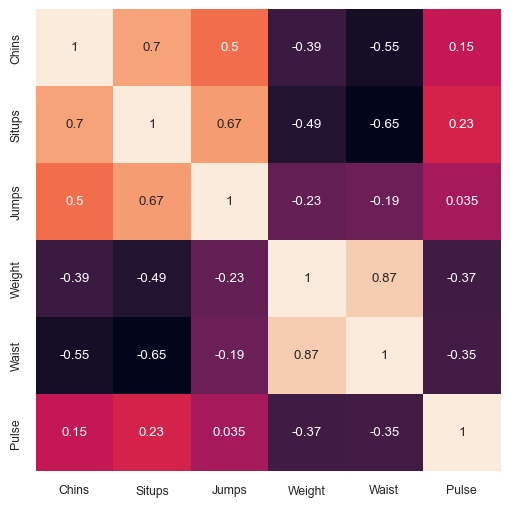

In [376]:
df_corr = df.corr()

plt.figure(figsize=(6, 6))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [377]:
# too low correlation between Jumps and Pulse

X = df
X = X.drop(columns=['Jumps','Pulse'], axis=1)

y = df['Pulse']

In [378]:
X

,Chins,Situps,Weight,Waist
0,5.0,162.0,191.0,36.0
1,2.0,110.0,189.0,37.0
2,12.0,101.0,193.0,38.0
3,12.0,105.0,162.0,35.0
4,13.0,155.0,189.0,35.0
5,4.0,101.0,182.0,36.0
6,8.0,101.0,211.0,38.0
7,6.0,125.0,167.0,34.0
8,15.0,200.0,176.0,31.0
9,17.0,251.0,154.0,33.0


In [379]:
y

0     50.0
1     52.0
2     58.0
3     62.0
4     46.0
5     56.0
6     56.0
7     60.0
8     74.0
9     56.0
10    50.0
11    52.0
12    64.0
13    50.0
14    46.0
15    62.0
16    54.0
17    52.0
18    54.0
19    68.0
Name: Pulse, dtype: float64

In [380]:
import matplotlib.pyplot as plt
import seaborn as sns

def showGraph(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [381]:
#FCN Model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam    

def buildModel():
    model = Sequential()

    model.add(Dense(4,input_shape=(4,),activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1))

    model.compile(Adam(learning_rate=0.02), loss = 'mse', metrics = ['mae'])
    return model

model = buildModel()
model.summary()

Model: "sequential_115"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_330 (Dense)           (None, 4)                 20        
                                                                 
 dense_331 (Dense)           (None, 4)                 20        
                                                                 
 dense_332 (Dense)           (None, 1)                 5         
                                                                 
Total params: 45 (180.00 Byte)
Trainable params: 45 (180.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [382]:
# To prevent cheating, standardize after dividing full dataset into train, val, test dataset
def standardize(train, val, test):
    
    train_mean = np.mean(train, axis = 0)
    train_std = np.std(train, axis = 0)

    X_train = (train - train_mean) / train_std
    X_val = (val - train_mean) / train_std
    X_test = (test - train_mean) / train_std
    
    return [X_train, X_val, X_test]

In [383]:
# change dataframe into numpy narray

X = X.values
y = y.values


[1th Fold progress]
Epoch 1/100
4/4 [==============================] - 1s 66ms/step - loss: 3175.1609 - mae: 56.0041 - val_loss: 3273.8228 - val_mae: 56.3194
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 3131.2844 - mae: 55.6047 - val_loss: 3181.1035 - val_mae: 55.5053
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 3073.5437 - mae: 55.0840 - val_loss: 3061.6497 - val_mae: 54.4377
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 2999.2131 - mae: 54.4003 - val_loss: 2896.6387 - val_mae: 52.9280
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 2894.6243 - mae: 53.4258 - val_loss: 2691.1091 - val_mae: 50.9849
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 2759.0801 - mae: 52.1122 - val_loss: 2433.6504 - val_mae: 48.4404
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 2600.3057 - mae: 50.5771 - val_loss: 2126.9038 - val_mae: 45.2188
Epoch 8/100
4

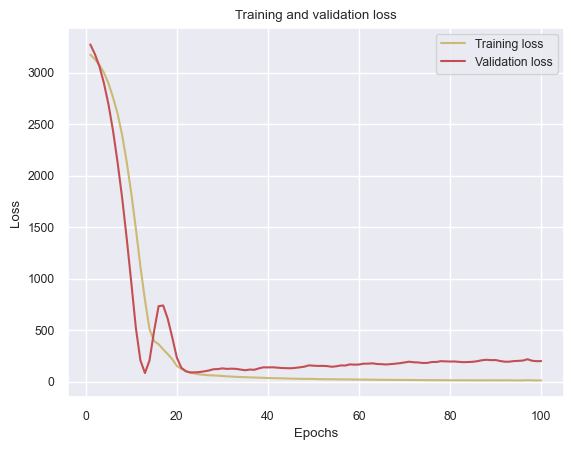

1/1 [==============================] - 0s 37ms/step - loss: 30.5299 - mae: 5.2968

[2th Fold progress]
Epoch 1/100
4/4 [==============================] - 1s 69ms/step - loss: 2937.9060 - mae: 53.9786 - val_loss: 3296.9380 - val_mae: 56.7833
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 2886.8835 - mae: 53.5120 - val_loss: 3246.3059 - val_mae: 56.3341
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 2836.6086 - mae: 53.0356 - val_loss: 3184.6428 - val_mae: 55.7775
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 2768.1719 - mae: 52.3883 - val_loss: 3104.5942 - val_mae: 55.0398
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 2680.2393 - mae: 51.5612 - val_loss: 3007.9763 - val_mae: 54.1310
Epoch 6/100
4/4 [==============================] - 0s 14ms/step - loss: 2573.0693 - mae: 50.4916 - val_loss: 2881.8528 - val_mae: 52.9149
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - los

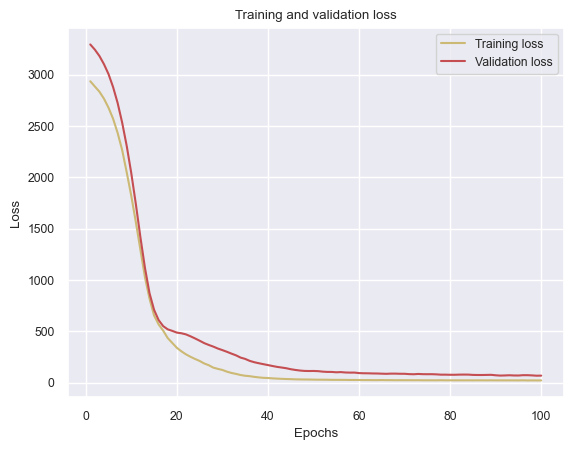

1/1 [==============================] - 0s 33ms/step - loss: 141.0345 - mae: 8.0970

[3th Fold progress]
Epoch 1/100
4/4 [==============================] - 1s 64ms/step - loss: 3191.6926 - mae: 55.8868 - val_loss: 3382.2961 - val_mae: 57.9623
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 3148.4407 - mae: 55.4859 - val_loss: 3302.3452 - val_mae: 57.2763
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 3095.1672 - mae: 55.0078 - val_loss: 3201.5249 - val_mae: 56.4018
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 3025.6038 - mae: 54.3612 - val_loss: 3079.5571 - val_mae: 55.3220
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 2937.9023 - mae: 53.5299 - val_loss: 2927.4551 - val_mae: 53.9389
Epoch 6/100
4/4 [==============================] - 0s 20ms/step - loss: 2818.6077 - mae: 52.4008 - val_loss: 2744.4485 - val_mae: 52.2164
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - lo

Epoch 61/100
4/4 [==============================] - 0s 15ms/step - loss: 13.9615 - mae: 3.2614 - val_loss: 128.2409 - val_mae: 9.6771
Epoch 62/100
4/4 [==============================] - 0s 16ms/step - loss: 13.7950 - mae: 3.2512 - val_loss: 125.4312 - val_mae: 9.6268
Epoch 63/100
4/4 [==============================] - 0s 16ms/step - loss: 13.2065 - mae: 3.2241 - val_loss: 123.8652 - val_mae: 9.6206
Epoch 64/100
4/4 [==============================] - 0s 19ms/step - loss: 12.6529 - mae: 3.1410 - val_loss: 126.5092 - val_mae: 9.7804
Epoch 65/100
4/4 [==============================] - 0s 18ms/step - loss: 12.4949 - mae: 3.1130 - val_loss: 126.2628 - val_mae: 9.8451
Epoch 66/100
4/4 [==============================] - 0s 16ms/step - loss: 12.2248 - mae: 3.0975 - val_loss: 129.0122 - val_mae: 10.1246
Epoch 67/100
4/4 [==============================] - 0s 18ms/step - loss: 11.7201 - mae: 2.9904 - val_loss: 131.5817 - val_mae: 10.2724
Epoch 68/100
4/4 [==============================] - 0s 17ms/

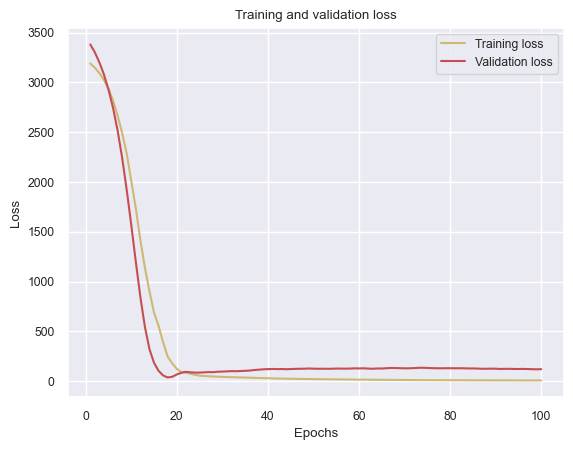

1/1 [==============================] - 0s 32ms/step - loss: 125.9188 - mae: 10.1120

[4th Fold progress]
Epoch 1/100
4/4 [==============================] - 1s 76ms/step - loss: 2967.1445 - mae: 54.2786 - val_loss: 3595.4478 - val_mae: 59.2744
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 2908.2629 - mae: 53.7360 - val_loss: 3538.8965 - val_mae: 58.8078
Epoch 3/100
4/4 [==============================] - 0s 20ms/step - loss: 2852.3635 - mae: 53.2064 - val_loss: 3488.5010 - val_mae: 58.4218
Epoch 4/100
4/4 [==============================] - 0s 16ms/step - loss: 2792.7500 - mae: 52.6413 - val_loss: 3427.0237 - val_mae: 57.9519
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 2722.8877 - mae: 51.9581 - val_loss: 3351.0730 - val_mae: 57.3661
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 2637.7336 - mae: 51.0860 - val_loss: 3257.5061 - val_mae: 56.6334
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - l

4/4 [==============================] - 0s 17ms/step - loss: 23.2019 - mae: 4.5364 - val_loss: 1906.0566 - val_mae: 34.2575
Epoch 61/100
4/4 [==============================] - 0s 24ms/step - loss: 21.9403 - mae: 4.4133 - val_loss: 1895.1730 - val_mae: 34.1591
Epoch 62/100
4/4 [==============================] - 0s 15ms/step - loss: 21.2583 - mae: 4.3308 - val_loss: 1898.8274 - val_mae: 34.2098
Epoch 63/100
4/4 [==============================] - 0s 15ms/step - loss: 20.3850 - mae: 4.2293 - val_loss: 1872.4197 - val_mae: 33.9272
Epoch 64/100
4/4 [==============================] - 0s 16ms/step - loss: 19.6301 - mae: 4.1609 - val_loss: 1882.6421 - val_mae: 33.9519
Epoch 65/100
4/4 [==============================] - 0s 17ms/step - loss: 18.6605 - mae: 4.0775 - val_loss: 1853.0859 - val_mae: 33.6550
Epoch 66/100
4/4 [==============================] - 0s 17ms/step - loss: 18.5169 - mae: 4.0674 - val_loss: 1775.9933 - val_mae: 33.0280
Epoch 67/100
4/4 [==============================] - 0s 17ms/s

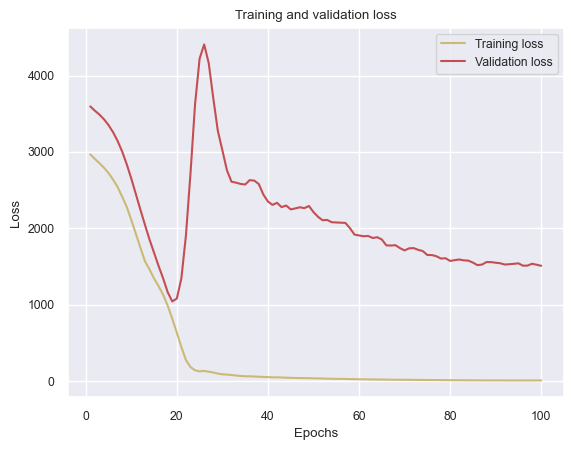

1/1 [==============================] - 0s 29ms/step - loss: 34.2319 - mae: 4.9793

[5th Fold progress]
Epoch 1/100
4/4 [==============================] - 1s 84ms/step - loss: 3271.6951 - mae: 56.6651 - val_loss: 3447.1169 - val_mae: 58.5126
Epoch 2/100
4/4 [==============================] - 0s 18ms/step - loss: 3207.7585 - mae: 56.1190 - val_loss: 3387.2471 - val_mae: 57.9990
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 3163.1492 - mae: 55.7208 - val_loss: 3328.6560 - val_mae: 57.4908
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 3112.1396 - mae: 55.2720 - val_loss: 3271.1033 - val_mae: 56.9873
Epoch 5/100
4/4 [==============================] - 0s 19ms/step - loss: 3056.0217 - mae: 54.7923 - val_loss: 3210.0117 - val_mae: 56.4484
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 3000.0449 - mae: 54.2740 - val_loss: 3136.7170 - val_mae: 55.7952
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - los

Epoch 61/100
4/4 [==============================] - 0s 17ms/step - loss: 22.1423 - mae: 3.4427 - val_loss: 93.6050 - val_mae: 7.6101
Epoch 62/100
4/4 [==============================] - 0s 16ms/step - loss: 21.5332 - mae: 3.3788 - val_loss: 94.7714 - val_mae: 7.6997
Epoch 63/100
4/4 [==============================] - 0s 18ms/step - loss: 21.2442 - mae: 3.3324 - val_loss: 96.1506 - val_mae: 7.7669
Epoch 64/100
4/4 [==============================] - 0s 17ms/step - loss: 20.7531 - mae: 3.2146 - val_loss: 99.9795 - val_mae: 7.8858
Epoch 65/100
4/4 [==============================] - 0s 18ms/step - loss: 20.3197 - mae: 3.1873 - val_loss: 101.8546 - val_mae: 7.9760
Epoch 66/100
4/4 [==============================] - 0s 17ms/step - loss: 20.0905 - mae: 3.1950 - val_loss: 101.1990 - val_mae: 7.9535
Epoch 67/100
4/4 [==============================] - 0s 18ms/step - loss: 19.4580 - mae: 3.1131 - val_loss: 102.0882 - val_mae: 7.9737
Epoch 68/100
4/4 [==============================] - 0s 16ms/step -

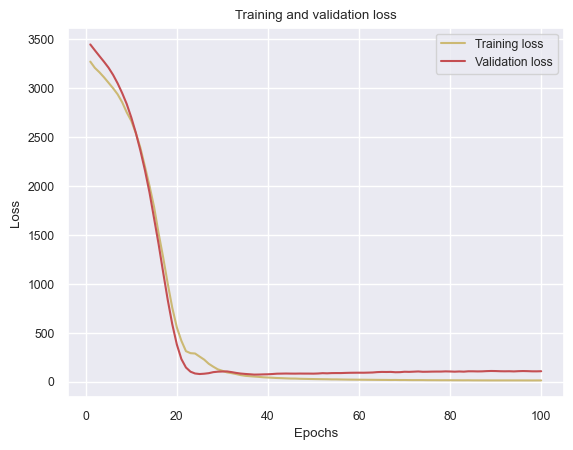

1/1 [==============================] - 0s 35ms/step - loss: 76.4155 - mae: 7.3687


In [384]:
# needs to K-fold cross-valdiation because of small dataset
# K = 5  60% train set 20% validation set 20% test set
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

lossList, maeList = list(), list()

i = 1;
for train_index, test_index in kf.split(X):
    print(f"\n[{i}th Fold progress]")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # divide train set into val and train set
    val_ratio = 0.25
    val_size = int(len(X_train) * val_ratio)

    # set indices randomly for val set
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    val_indices = indices[:val_size]
    train_indices = indices[val_size:]
    
    X_val = X_train[val_indices]
    y_val = y_train[val_indices]

    X_train = X_train[train_indices]
    y_train = y_train[train_indices]
    
    X_train, X_val, X_test = standardize(X_train, X_val, X_test)
    
    model = buildModel()
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=3, validation_data=(X_val, y_val))
    showGraph(history)
    
    loss, mae = model.evaluate(X_test, y_test)
    lossList.append(loss)
    maeList.append(mae)
    i += 1 

In [385]:
print("Result")
print(f"mseList:{lossList}\nmaeList:{maeList}")
print(f"mse: {sum(lossList)/K}")
print(f"mae: {sum(maeList)/K}")

Result
mseList:[30.529922485351562, 141.0344696044922, 125.9188232421875, 34.23193359375, 76.41552734375]
maeList:[5.296784400939941, 8.097015380859375, 10.112049102783203, 4.979273796081543, 7.368746757507324]
mse: 81.62613525390626
mae: 7.170773887634278
